In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
adv_sales = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
adv_sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
adv_sales.shape

(200, 5)

There are 5 columns and 200 rows.

In [5]:
adv_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [56]:
data_desc =adv_sales.describe()
data_desc

,TV,radio,newspaper,sales
count,200.000000,200.000000,2.000000e+02,200.000000
mean,147.042500,23.264000,4.096723e-16,14.022500
std,85.854236,14.846809,1.002509e+00,5.217457
min,0.700000,0.000000,-2.324725e+00,1.600000
25%,74.375000,9.975000,-7.576721e-01,10.375000
50%,149.750000,22.900000,4.196225e-03,12.900000
75%,218.825000,36.525000,7.876825e-01,17.400000
max,296.400000,49.600000,2.529435e+00,27.000000


In [7]:
adv_sales.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

### Observations :

* In this data set we havr to predict the total sales generated from all the sales channel.problem seems regression.
* There is no null values in dataset.
* In the radio column there is zero "0" which we have to make authentic our data.
* In the mean column we see the variation is high between columns.

### Backup dataset

In [54]:
Backup_data = adv_sales.copy()

In [8]:
sns.set(style = 'darkgrid')

## Exploratory Data Analysis (EDA)

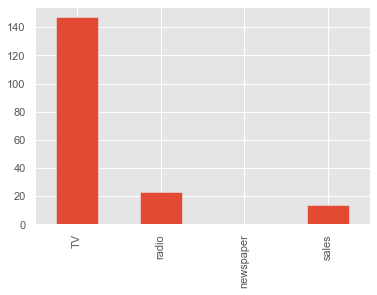

In [58]:
#checking the variations between columns
plt.style.use('ggplot')
data_desc.loc['mean'].plot.bar()

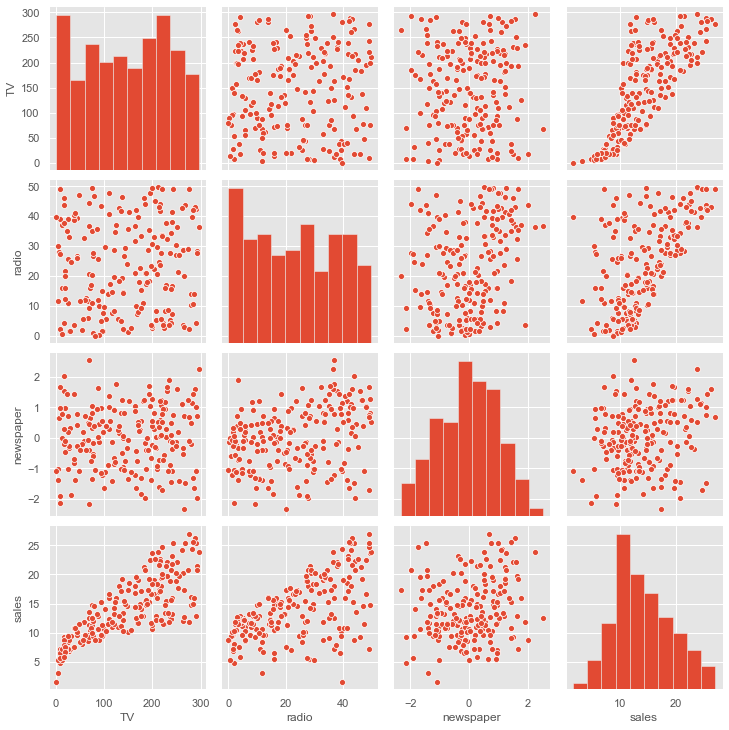

In [61]:
sns.pairplot(adv_sales)

In [9]:
#Removing the unnamed column
adv_sales = adv_sales.drop(['Unnamed: 0'],axis=1)

In [10]:
adv_sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Figure size 1080x576 with 0 Axes>

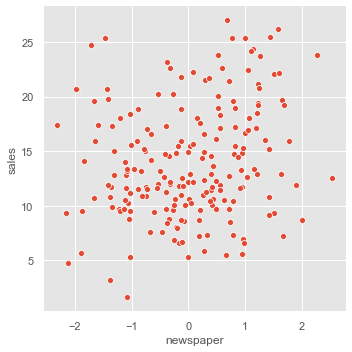

In [65]:
plt.figure(figsize=(15,8))
sns.relplot(x = 'newspaper', y = 'sales',data=adv_sales,markers = True)

Relational plot using the relplot and visualize the relation between sales and newspaper.here we can see our data is
not distributed linearly and we can see somewhere it is showing negatively corelation

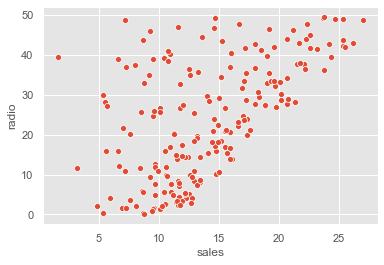

In [66]:
sns.scatterplot(x = 'sales', y = 'radio', data = adv_sales,markers = True)

As per above sales and radio showing strong relationshp

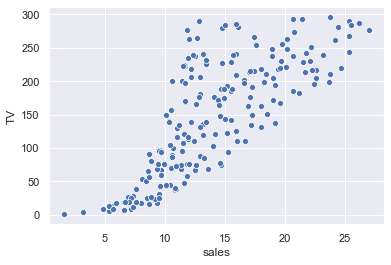

In [13]:
sns.scatterplot(x = 'sales', y = 'TV', data = adv_sales,markers = True)

 similerly as per above sales and radio showing strong relationshp

## Outliars detection and removel

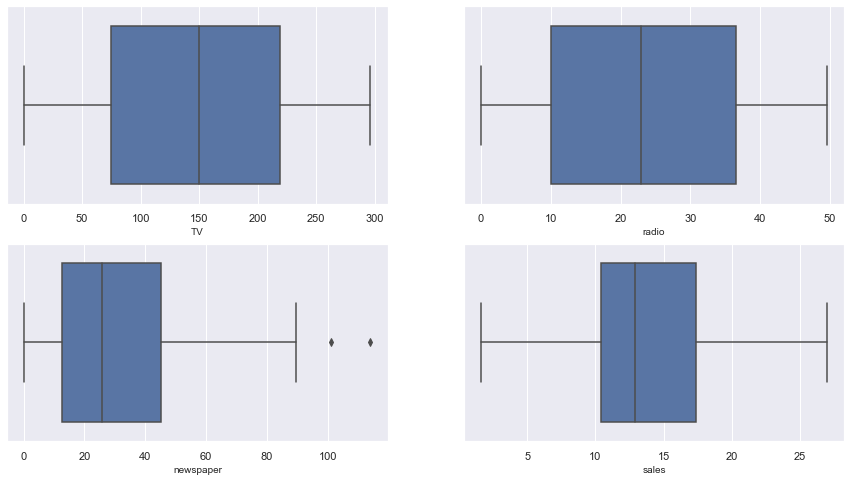

In [14]:
plt.figure(figsize=(15,8))
pltnumber = 1
for i in adv_sales:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.boxplot(adv_sales[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show() 

In the newspaper column we can see there is a outliars.here we are using PowerTransformer technique for outliar removel.

In [15]:
from sklearn.preprocessing import PowerTransformer

In [16]:
power = PowerTransformer(method='yeo-johnson')

In [17]:
adv_sales['newspaper'] = power.fit_transform(adv_sales['newspaper'].values.reshape(-1,1))

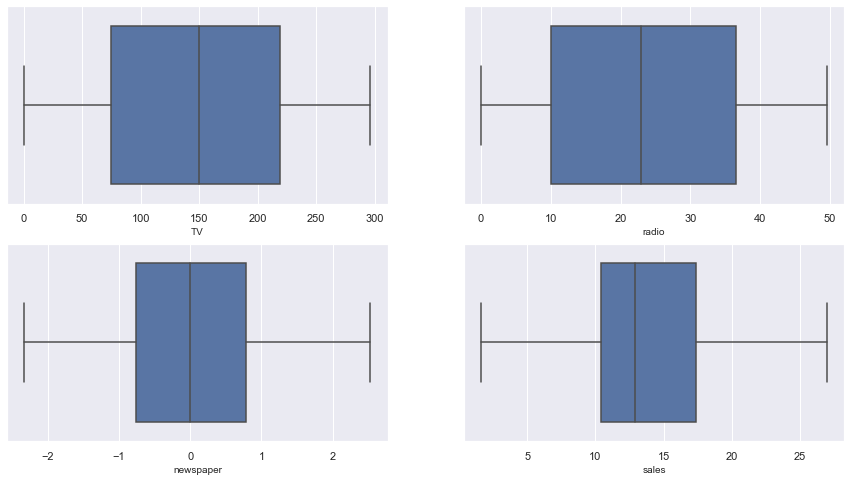

In [18]:
plt.figure(figsize=(15,8))
pltnumber = 1
for i in adv_sales:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.boxplot(adv_sales[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()

In [19]:
adv_sales.shape

(200, 4)

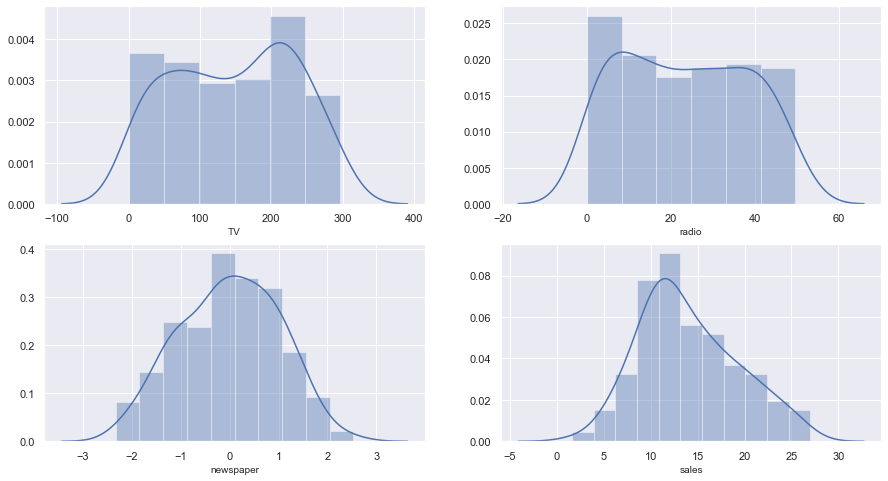

In [20]:
plt.figure(figsize=(15,8))
pltnumber = 1
for i in adv_sales:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.distplot(adv_sales[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()        

In [21]:
corr = adv_sales.corr()

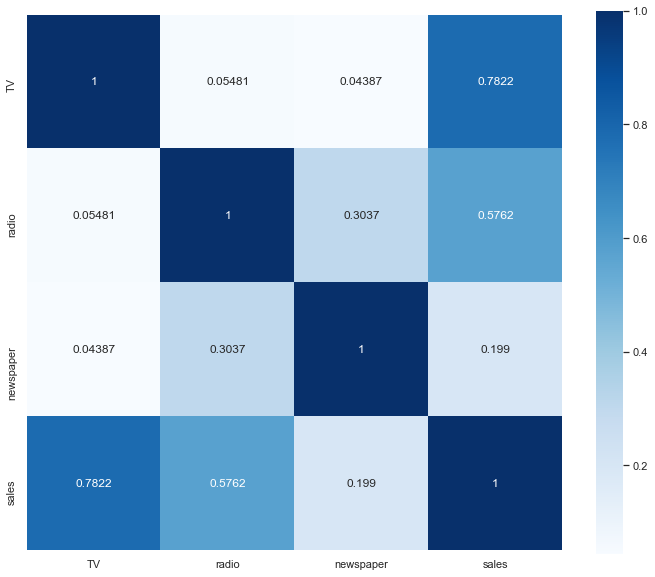

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,cbar=True, square=True,fmt='.4g',annot=True,annot_kws={'size':12},cmap='Blues')

As per heatmap TV and radio showing good correlation.However newspaper is not showing that much relation with sales.

### Feature Engeneering !

In [23]:
# importing StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler 

# importing train test split
from sklearn.model_selection import train_test_split

In [24]:
# Dividing the features and label
X = adv_sales.drop(['sales'],axis=1)
y = adv_sales['sales']

In [25]:
print("Shape of X", X.shape)
print("Shape of Y", y.shape)

Shape of X (200, 3)
Shape of Y (200,)


In [26]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test  = train_test_split(x_scale, y, test_size=0.20, random_state=42)

### Model Building....!

* Importing libraries for model building......!

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [29]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
svm=SVR()
print("Model is created")

Model is created


In [30]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm=svm.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [31]:
print("lr_score",lr.score(X_train,y_train))
print("knn_score",knn.score(X_train,y_train))
print("dt_score",dt.score(X_train,y_train))
print("rf_score",rf.score(X_train,y_train))
print("adb_score",adb.score(X_train,y_train))
print("svm_score",svm.score(X_train,y_train))

lr_score 0.8958154660374587
knn_score 0.9555368451491638
dt_score 1.0
rf_score 0.9965117622536026
adb_score 0.9765898674106341
svm_score 0.9130510951351035


### Model Evaluation

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)
svm_pred_y = svm.predict(X_test)

In [34]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))
print("svm_score",mean_squared_error(y_test,svm_pred_y))

lr_score 3.172115437090813
knn_score 2.145460000000001
dt_score 2.2184999999999997
rf_score 0.5482607500000013
adb_score 1.0527769013955077
svm_score 3.233812244532794


# CrossValidation

In [35]:
from sklearn.model_selection import KFold,cross_val_score

In [36]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [37]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scale,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scale,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scale,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scale,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scale,y,cv=5))
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scale,y,cv=5))

Cross validation score for lr model => [0.87801035 0.91744411 0.92988735 0.81623209 0.89538986]
Cross validation score for knn model => [0.94215489 0.95122685 0.96156695 0.87339024 0.94645441]
Cross validation score for dt model => [0.96403904 0.95838596 0.93558159 0.95071285 0.96932105]
Cross validation score for rf model => [0.9831034  0.98473865 0.96998049 0.96170741 0.97987844]
Cross validation score for adb model => [0.95746531 0.97512201 0.9381811  0.94075431 0.95067997]
Cross validation score for svm model => [0.88839838 0.94522104 0.94007736 0.80441618 0.92587984]


In [38]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scale,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scale,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scale,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scale,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scale,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scale,y,cv=5).mean())

Cross validation score for lr model => 0.8873927517379308
Cross validation score for knn model => 0.9349586682110838
Cross validation score for dt model => 0.95770492235359
Cross validation score for rf model => 0.9768090036970148
Cross validation score for adb model => 0.9523115403874558
Cross validation score for svm model => 0.900798561132761


In the cross validation i found our  svm model can be a good predictor for our regression problem.and In oder to increase the chances of accuracy we will check the hyperparameter tuning.

### HyperParameter Tuning !

In [39]:
from sklearn.model_selection import GridSearchCV

HyperParameter for support vactor machine learning

In [40]:
svm.get_params().keys()  # to check the parameters

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [41]:
parm_grid = {'kernel':['linear', 'poly','sigmoid'],
             'degree':[2,3,5,6],'gamma': ['scale','auto'],
             'C': [0.1, 1, 10, 100, 1000]}
print('parm_grid',parm_grid)

parm_grid {'kernel': ['linear', 'poly', 'sigmoid'], 'degree': [2, 3, 5, 6], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 100, 1000]}


In [42]:
gridsearch = GridSearchCV(estimator = svm , param_grid = parm_grid)

In [43]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'sigmoid']})

In [44]:
gridsearch.best_params_

{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [45]:
svm_gridsearch = SVR(C= 100, degree= 2, gamma= 'scale', kernel= 'linear')

In [46]:
svm_gridsearch.fit(X_train,y_train)

SVR(C=100, degree=2, kernel='linear')

In [47]:
svm_gridsearch.score(X_train,y_train)

0.8895382791811844

There is no effect we can see in score after using hyperparameter tuning

## Model saving

In [51]:
import pickle

In [52]:
filename = 'advertisement_model.pickle'

In [53]:
pickle.dump(svm,open(filename,'wb'))

### Thank You........!